<a href="https://colab.research.google.com/github/udoyroy98/Motor_Fault_Detection_ML/blob/main/KNN_fold_Motor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as snNew
import pandas as pdNew
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import seaborn as sns
import matplotlib.pyplot as pltNew

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/0-5train.csv')

In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,9]

In [ ]:

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Cross-validation to find optimal k
k_values = list(range(40,80))
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

optimal_k = k_values[np.argmax(cv_scores)]
print(f"Optimal k: {optimal_k}")

# Train KNN with optimal k
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)



Optimal k: 40


In [ ]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1_score =  f1_score(y_test, y_pred, average='macro')


print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1_score:.4f}")


Accuracy: 0.9877
Recall: 0.9876
Precision: 0.9877
F1-Score: 0.9876


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) #accuracy

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     25035
           1       0.98      0.99      0.98     25074
           2       0.99      0.98      0.98     24894

    accuracy                           0.99     75003
   macro avg       0.99      0.99      0.99     75003
weighted avg       0.99      0.99      0.99     75003



In [ ]:
from sklearn.metrics import confusion_matrix
c_mat = confusion_matrix(y_test, y_pred)
c_mat

array([[25032,     0,     3],
       [  109, 24712,   253],
       [   37,   524, 24333]])

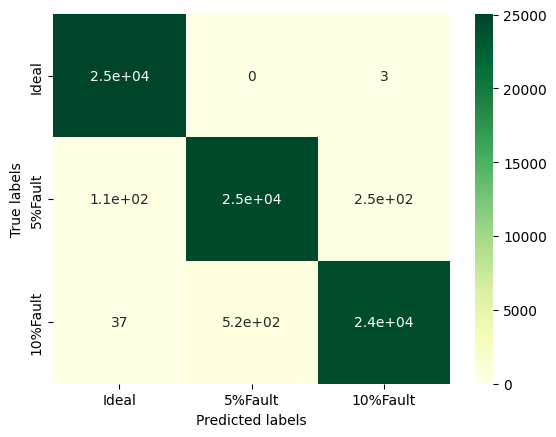

In [ ]:
ax= plt.subplot()
confusion_matrix = pdNew.DataFrame(c_mat, range(3), range(3))
snNew.heatmap(confusion_matrix, annot=True ,cmap="YlGn", ax=ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.xaxis.set_ticklabels(['Ideal', '5%Fault','10%Fault']); ax.yaxis.set_ticklabels(['Ideal', '5%Fault','10%Fault']);
pltNew.show()